In [6]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
# 读取数据文件
data, meta = arff.loadarff('php0iVrYT.arff')

# # 转换为pandas DataFrame
df = pd.DataFrame(data)
data = df

# 选择特征列
X = data.iloc[:, :-1]

# 选择目标列
y = data.iloc[:, -1]

# 将目标列转换为整数类型
y = y.str.decode('utf-8').astype(int)

# 展示数据内容
print(df)
print(df.describe().T)




       V1    V2       V3    V4 Class
0     2.0  50.0  12500.0  98.0  b'2'
1     0.0  13.0   3250.0  28.0  b'2'
2     1.0  16.0   4000.0  35.0  b'2'
3     2.0  20.0   5000.0  45.0  b'2'
4     1.0  24.0   6000.0  77.0  b'1'
..    ...   ...      ...   ...   ...
743  23.0   2.0    500.0  38.0  b'1'
744  21.0   2.0    500.0  52.0  b'1'
745  23.0   3.0    750.0  62.0  b'1'
746  39.0   1.0    250.0  39.0  b'1'
747  72.0   1.0    250.0  72.0  b'1'

[748 rows x 5 columns]
    count         mean          std    min     25%     50%     75%      max
V1  748.0     9.506684     8.095396    0.0    2.75     7.0    14.0     74.0
V2  748.0     5.514706     5.839307    1.0    2.00     4.0     7.0     50.0
V3  748.0  1378.676471  1459.826781  250.0  500.00  1000.0  1750.0  12500.0
V4  748.0    34.282086    24.376714    2.0   16.00    28.0    50.0     98.0


In [14]:
def knn_predict(X_train, y_train, x_test, k):
    # 计算测试样本与训练样本之间的欧氏距离
    dists = distance.cdist(X_train, x_test.reshape(1, -1))
    
    # 按距离排序，返回索引
    sorted_indices = np.argsort(dists, axis=0)
    
    # 获取k个最近邻的标签
    k_nearest_labels = y_train[sorted_indices[:k]]
    
    # 统计每个标签的出现次数
    counts = np.bincount(k_nearest_labels.flatten())
    
    # 返回出现次数最多的标签作为预测结果
    return np.argmax(counts)


In [15]:
# 定义测试样本
x_test = np.array([2.0, 50.0, 12500.0, 98.0])

# 定义k值
k = 5

# 预测测试样本的标签
predicted_label = knn_predict(X.values, y.values, x_test, k)

print('Predicted label:', predicted_label)


Predicted label: 2


Best k: 5
Best accuracy: 0.8716577540106952


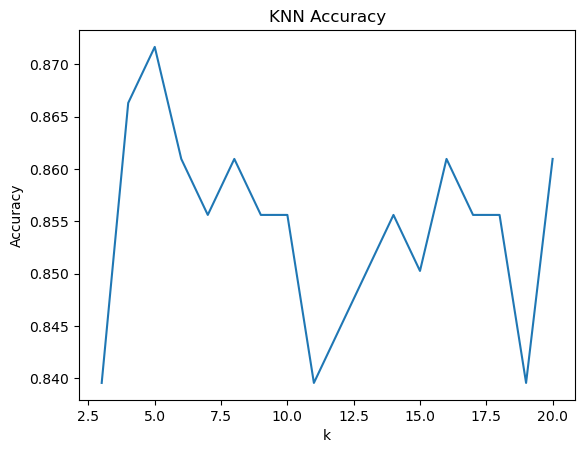

In [29]:

# 遍历k值，计算预测准确率
k_values = range(3, 21)
accuracy_scores = []

for k in k_values:
    correct_predictions = 0
    
    for i in range(len(X_test)):
        x_test = X_test.iloc[i].values
        true_label = y_test.iloc[i]
        
        predicted_label = knn_predict(X_train.values, y_train.values, x_test, k)
        
        if predicted_label == true_label:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(X_test)
    accuracy_scores.append(accuracy)

# 找到准确率最高的k值
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print('Best k:', best_k)
print('Best accuracy:', best_accuracy)

# 可视化准确率随k值变化的曲线
plt.plot(k_values, accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.show()

Accuracy: 0.8716577540106952


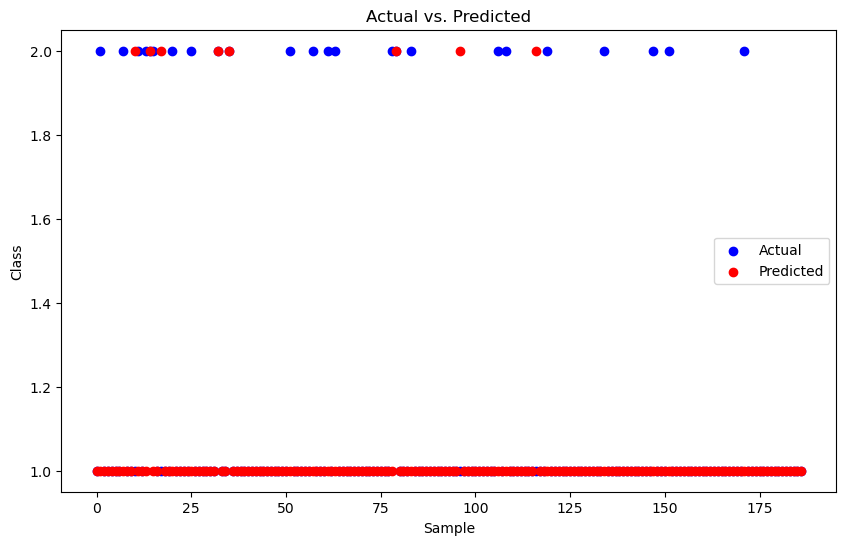

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# 定义k值
k = best_k

# 定义存储预测结果的列表
predictions = []

# 遍历测试集的每个样本进行预测
for i in range(len(X_test)):
    x_test = X_test.iloc[i].values
    predicted_label = knn_predict(X_train.values, y_train.values, x_test, k)
    predictions.append(predicted_label)

# 计算预测准确率
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy


In [32]:
class Node:
    def __init__(self, feature=None, threshold=None, label=None):
        self.feature = feature  # 分裂特征的索引
        self.threshold = threshold  # 分裂特征的阈值
        self.label = label  # 叶节点的标签
        self.left = None  # 左子节点
        self.right = None  # 右子节点


class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_info_gain=0.0):
        self.max_depth = max_depth  # 最大深度
        self.min_samples_split = min_samples_split  # 最小样本数
        self.min_info_gain = min_info_gain  # 最小信息增益阈值
        self.root = None  # 根节点


In [33]:
#计算熵
def entropy_impurity(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return entropy(probabilities, base=2)

#计算信息增益
def information_gain(parent_labels, left_labels, right_labels):
    parent_impurity = entropy_impurity(parent_labels)#父节点的熵不纯度
    left_weight = len(left_labels) / len(parent_labels)# 左子树的权重
    right_weight = len(right_labels) / len(parent_labels)# 右子树的权重
    left_impurity = entropy_impurity(left_labels)# 左子树的熵不纯度
    right_impurity = entropy_impurity(right_labels)# 右子树的熵不纯度
    gain = parent_impurity - (left_weight * left_impurity + right_weight * right_impurity)#算出总信息增益
    return gain


def split_data(X, y, feature, threshold):
    left_indices = np.where(X[:, feature] <= threshold)[0]
    right_indices = np.where(X[:, feature] > threshold)[0]
    left_X, left_y = X[left_indices], y[left_indices]
    right_X, right_y = X[right_indices], y[right_indices]
    return left_X, left_y, right_X, right_y

#找到最佳分裂特征和阈值
def find_best_split(X, y):
    best_gain = -np.inf#初始化最佳增益best_gain为负无穷大
    best_feature = None
    best_threshold = None
    for feature in range(X.shape[1]):
        #对于每个特征，获取该特征的唯一值作为可能的分裂阈值。
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
            if len(left_y) > 0 and len(right_y) > 0:
                #计算信息增益
                gain = information_gain(y, left_y, right_y)
                #如果当前的信息增益大于最佳增益best_gain，则更新最佳增益、最佳特征和最佳阈值。
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
    return best_feature, best_threshold


def majority_vote(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]
    return majority_label

#建立树
def build_tree(X, y, max_depth, min_samples_split, min_info_gain):
    #已到达最大深度、或者是熵不纯度小于最小信息增益，则返回叶节点
    if max_depth == 0 or len(X) < min_samples_split or entropy_impurity(y) < min_info_gain:
        leaf = Node(label=majority_vote(y))
        return leaf
    #如果不满足上述条件，则调用find_best_split函数来找到最佳分裂特征和阈值。
    feature, threshold = find_best_split(X, y)
    if feature is None or threshold is None:
        leaf = Node(label=majority_vote(y))
        return leaf

    left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
    left_subtree = build_tree(left_X, left_y, max_depth - 1, min_samples_split, min_info_gain)
    right_subtree = build_tree(right_X, right_y, max_depth - 1, min_samples_split, min_info_gain)

    node = Node(feature=feature, threshold=threshold)
    node.left = left_subtree
    node.right = right_subtree
    return node


def predict_sample(x, node):
    if node.label is not None:
        return node.label
    if x[node.feature] <= node.threshold:
        return predict_sample(x, node.left)
    else:
        return predict_sample(x, node.right)

#进行预测
def predict(X, root):
    predictions = []
    for i in range(len(X)):
        x = X[i]
        prediction = predict_sample(x, root)
        predictions.append(prediction)
    return predictions


Accuracy: 0.8181818181818182


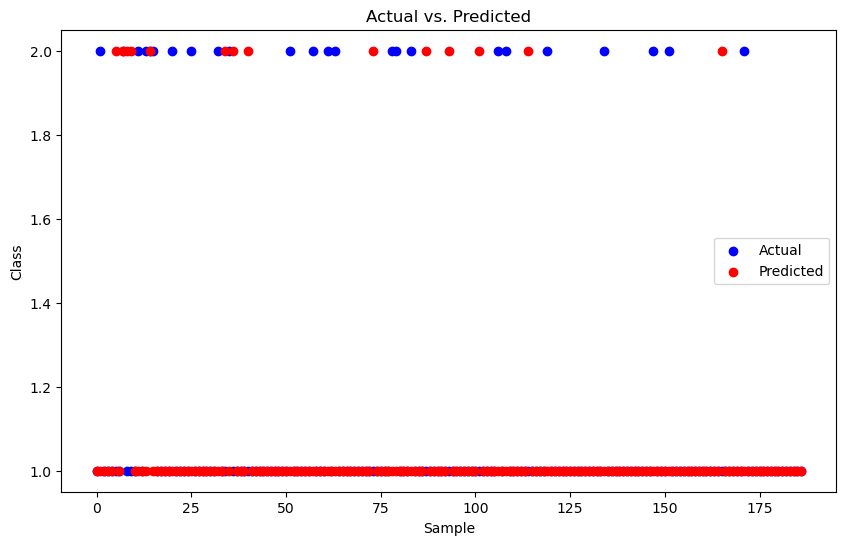

In [35]:
# 构建决策树模型
tree = DecisionTree(max_depth=5, min_samples_split=2, min_info_gain=0.0)
tree.root = build_tree(X_train.values, y_train.values, tree.max_depth, tree.min_samples_split, tree.min_info_gain)

# 在测试集上进行预测
predictions = predict(X_test.values, tree.root)

# 计算预测准确率
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


In [37]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = None
        self.feature_probs = None
        self.classes = None

    def fit(self, X, y):
        # 根据训练数据拟合分类器
        self.classes = np.unique(y)  # 找到所有唯一的类别
        self.class_priors = self.calculate_class_priors(y)  # 计算类别的先验概率
        self.feature_probs = self.calculate_feature_probs(X, y)  # 计算特征的条件概率

    def calculate_class_priors(self, y):
        # 计算类别的先验概率
        class_priors = {}
        total_samples = len(y)  # 总样本数
        for class_label in self.classes:
            class_samples = np.sum(y == class_label)  # 属于当前类别的样本数
            class_priors[class_label] = class_samples / total_samples  # 计算当前类别的先验概率
        return class_priors

    def calculate_feature_probs(self, X, y):
        # 计算特征的条件概率
        feature_probs = {}
        for class_label in self.classes:
            class_samples = X[y == class_label]  # 属于当前类别的样本
            feature_probs[class_label] = {}
            for feature_idx in range(X.shape[1]):
                feature_values = class_samples[:, feature_idx]  # 当前特征的取值
                unique_values, counts = np.unique(feature_values, return_counts=True)  # 计算当前特征取值的频数
                total_count = np.sum(counts)  # 当前特征取值的总频数
                probs = counts / total_count  # 当前特征取值的频率
                feature_probs[class_label][feature_idx] = dict(zip(unique_values, probs))  # 将特征取值与对应的概率关联起来
        return feature_probs

    def predict(self, X):
        # 对新数据进行预测
        predictions = []
        for sample in X:
            class_scores = []
            for class_label in self.classes:
                class_score = np.log(self.class_priors[class_label])  # 当前类别的先验概率的对数
                for feature_idx, feature_value in enumerate(sample):
                    if feature_value in self.feature_probs[class_label][feature_idx]:
                        # 如果特征的取值在条件概率中存在
                        class_score += np.log(self.feature_probs[class_label][feature_idx][feature_value])
                        # 添加对数形式的条件概率到当前类别得分中
                class_scores.append(class_score)  # 添加当前类别得分到类别得分列表中
            predicted_class = self.classes[np.argmax(class_scores)]  # 根据得分最高的类别进行预测
            predictions.append(predicted_class)  # 添加预测结果到预测列表中
        return predictions


Accuracy: 0.6737967914438503


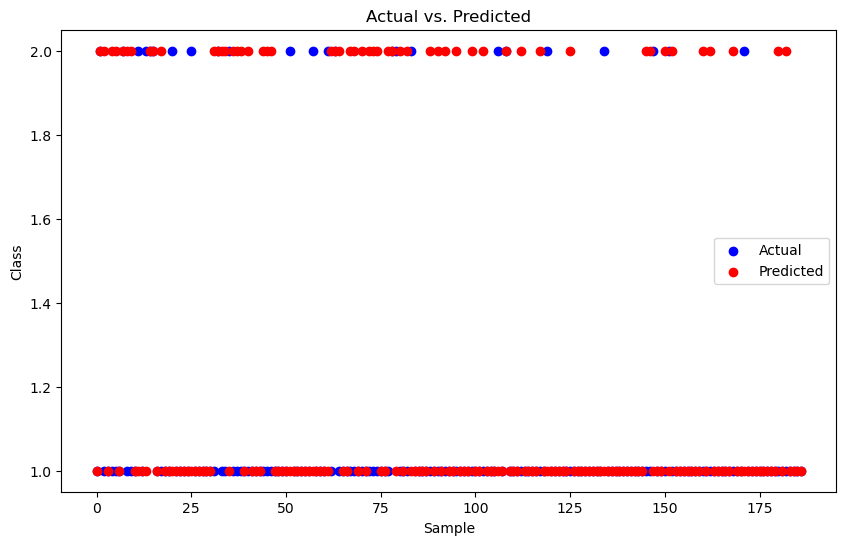

In [38]:
# 创建朴素贝叶斯分类器实例
nb_classifier = NaiveBayesClassifier()

# 在训练集上训练分类器
nb_classifier.fit(X_train.values, y_train.values)

# 在测试集上进行预测
predictions = nb_classifier.predict(X_test.values)

# 计算预测准确率
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()